### Load the required packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import datetime as dt

In [13]:
tweet = pd.read_csv("china_082019_1_tweets_csv_hashed.csv")
user = pd.read_csv("china_082019_1_users_csv_hashed.csv")

#### Users

In [15]:
user.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,NaN,NaN,NaN,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,NaN,NaN,NaN,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,NaN,NaN,NaN,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,NaN,NaN,NaN,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,NaN,NaN,NaN,0,0,2017-09-11,zh-tw


In [18]:
print(tweet.shape)
print(user.shape)

(1906831, 31)
(744, 10)


In [20]:
user.dtypes

userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count               int64
following_count              int64
account_creation_date       object
account_language            object
dtype: object

In [46]:
user['account_creation_date'].nunique()
#user['create_m'] = pd.to_datetime(user['account_creation_date']).dt.month

289

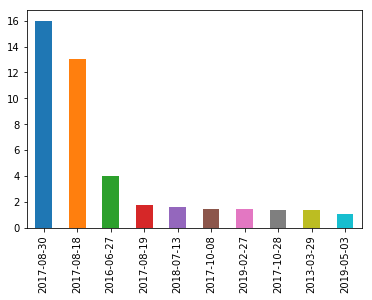

In [49]:
fig = plt.figure()
((pd.value_counts(user['account_creation_date'])[:10])/744*100).plot.bar()

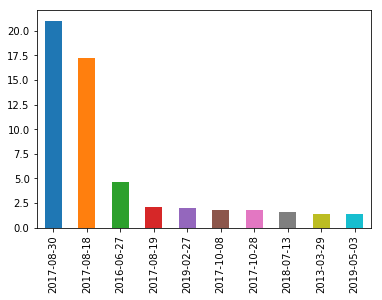

In [64]:
no_location = user[user['user_reported_location'].isnull()].copy()
fig = plt.figure()
((pd.value_counts(no_location['account_creation_date'])[:10])/562*100).plot.bar()

In [50]:
user['account_language'].value_counts()

zh-cn    569
en       104
ru        36
zh-CN     13
zh-tw     10
es         8
en-gb      3
ja         1
Name: account_language, dtype: int64

In [90]:
user[(user['following_count'] >= 2001) & (user['follower_count'] <2000)]

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,create_m


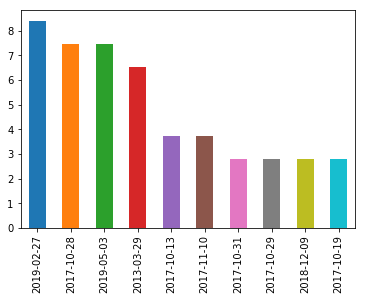

In [93]:
no_follow = user[(user['following_count'] == 0) & (user['follower_count'] == 0)].copy()
fig = plt.figure()
((pd.value_counts(no_follow['account_creation_date'])[:10])/107*100).plot.bar()

In [88]:
user['userid'].nunique()

744

### Summary of user part:

1. There are 744 unique users in the set1.
2. 592 (79.6%) use zh-CN. ( a simplified chinese from China)
3. There is no fake account from only following count and follwer count perspectives. Twitter has its limitiion on how many accounts you can follow, and the number is 2000. Robot-like accounts should look like following more than 2000 acounts but have very few followers. However, i don't find it here.
4. Almost 31% accounts are created on 2017/8/18 and 2017/8/30. Should follow what happen during 2017 summer.
5. For those who have no follower and not following any, 7/10 of the top 10 account create date are in 2017 winter.

#### Tweets~

In [82]:
tweet.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [14]:
tweet.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,436306424587890688,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,1.0,0.0,NaN,NaN,[443196382],NaN
1,582682975969624064,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,52.0,[],['http://goo.gl/32K38q'],[],NaN
2,582997936541278208,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[116351908],NaN
3,580404049901670400,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://goo.gl/iC1GM9'],[],NaN
4,199007241142149121,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,NaN,['http://migre.me/8Ycqm'],NaN,NaN


In [19]:
tweet.describe()

,tweetid,follower_count,following_count,in_reply_to_tweetid,quoted_tweet_tweetid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count
count,1.906831e+06,1.906831e+06,1.906831e+06,1.785020e+05,9.513300e+04,3.579360e+05,1.888906e+06,1.888906e+06,1.888906e+06,1.888906e+06
mean,7.206899e+17,2.444543e+04,1.350040e+04,5.869991e+17,8.621642e+17,6.013256e+17,7.288346e-03,8.859573e-02,4.557506e-02,1.496379e-01
std,2.729179e+17,2.948863e+04,9.531729e+03,3.471806e+17,8.568681e+16,2.745685e+17,4.159671e-01,9.644296e-01,1.644062e+00,3.454932e+00
min,8.126727e+08,0.000000e+00,0.000000e+00,8.237374e+08,1.847925e+15,1.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.789587e+17,1.089500e+04,9.050000e+03,2.715412e+17,8.376187e+17,4.314172e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.170222e+17,1.355300e+04,1.359200e+04,6.053735e+17,8.417812e+17,5.771102e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.716381e+17,1.890000e+04,1.460600e+04,9.028863e+17,8.525281e+17,8.528084e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.154216e+18,1.701550e+05,3.175200e+04,1.153504e+18,1.154193e+18,1.154179e+18,1.930000e+02,3.260000e+02,1.159000e+03,3.344000e+03


In [70]:
tweet.groupby('userid')['tweetid'].count().sort_values(ascending=False)

userid
769790067183190016                              268284
206027550                                       220664
620912741                                       183862
718766229700227072                              177415
791015242448850945                              161905
761109495187513344                              157467
760761981854883840                              118993
158077925                                        88709
2346026113                                       38472
363345298                                        29132
825851272515375105                               23494
533748701                                        20405
455662560                                        16101
QVr+qYj7OTUbWgxNe8gbFgqkfnPKR6KZQFkt3pOmA=       14961
325103066                                        12337
360353820                                        11932
908589031944081408                               10445
898019248341106688                                9705
191

In [108]:
tweet['hashtags'].value_counts().sort_values(ascending=False)[:30]

[]                                                                     1182684
['ptl']                                                                  81796
['pltl']                                                                 48247
['tlrp']                                                                 36608
['nrp']                                                                  21927
['RT']                                                                    7054
['WTL']                                                                   6761
['wtl']                                                                   6562
['rtl']                                                                   6556
['PTL']                                                                   6194
['RTL']                                                                   5777
['rptl']                                                                  5560
['openfollow']                                      

In [114]:
tweet[tweet['tweet_text'].str.contains('香港')]['tweet_text']

14134      大连庭审宣判后郭文贵表现格外反常？一会儿佩戴一个不知道从哪里来的徽章狐假虎威，一会儿嚷嚷要血...
26446      中新网3月4日电 据香港《星岛日报》报道，一项最新刊于《科学》的研究显示，受全球气候变暖影响...
70246      #HongKongProtest #香港 #七一 #游行 #民阵 7月1日反对派宣扬暴力冲击...
207727     反对势力想尽办法想搞乱香港，想等混乱的时候谋取利益，他们根本就无暇顾及市民的利益，可怜的是还...
335059     中新网3月7日电 据香港《星岛日报》报道，西班牙一家动物园内一只被称为“世界上最悲伤的大象”...
423884     RT stillovelyyy: [✨香港✨] Baeby329 2017 Cheering...
465612                                        严惩不法份子，还香港一个安定
468855     独家：九鼎集团求售香港保险业务 价值至多25亿美元--消息人士 https://t.co/Y...
476221     香港立法會九龍西地方選區補選（25日）上午7時30分拉開帷幕。5號候選人陳凱欣以民生優先的理...
476290     https://t.co/v4uRmSbyQl【50年有例外！】【法律依据在此：终止一国两制...
490981     在被冻结香港银行账户后，郭文贵近日决定上诉香港法院，希望借此解冻账户。这起诉讼暴露了郭文贵正...
499540                                香港最长隧道即将通车 打通粤港东部交通大动脉
509992     我成长背景特简单，父母是普通的小市民，做一点小生意，父亲比较严谨，从来不开玩笑的。父亲是厦门...
516950     #郭文贵 移民和买房的承诺尚未兑现，宋军便已失去人身自由。宋军称，郭文贵还曾提出要在香港租赁...
525995     中国内地和香港两地上市A+H股股价对比表--9月10日 https://t.co/vBpIC...
531086     @medvedeva8072 @mariiak83417656 @q8Gqoi8XV8Ymy...
533565     香港特首称稍后将与美国商会

### Concat user with tweet data